In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3504.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3926.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3721.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3851.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3749.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3975.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3223.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3577.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3615.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3931.txt


In [2]:
import os
import random
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm 
import random
import matplotlib.pyplot as plt
import yaml
import shutil

In [3]:
!pip install ultralytics

import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 22.6 MB/s eta 0:00:0000:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!pip3 uninstall wandb -y

Found existing installation: wandb 0.19.1
Uninstalling wandb-0.19.1:
  Successfully uninstalled wandb-0.19.1


In [5]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8s model
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 220MB/s]


In [6]:
!yolo task=detect mode=train model=yolov8n.pt data="/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml" epochs=50 imgsz=640 plots=True

100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 140MB/s]
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

In [9]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data="/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml"

Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yol
val: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        800       2877      0.936      0.881      0.936      0.817
                  trak        113        120      0.946      0.992      0.984      0.941
               cyclist        188        234      0.928      0.774      0.852      0.683
                  bike        340        486      0.957      0.856      0.939      0.762
                 tempo        123        134      0.932      0.873      0.955      0.841
                   car        307        524      0.963      0.838      0.94


image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3886.jpg: 384x640 2 cars, 1 auto-rickshaw, 1 person, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3209.jpg: 384x640 1 trak, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3368.jpg: 384x640 1 bike, 1 car, 2 auto-rickshaws, 1 person, 6.7ms
Speed: 2.0ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3699.jpg: 384x640 1 cyclist, 1 bike, 3 cars, 1 auto-rickshaw, 2 persons, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

im

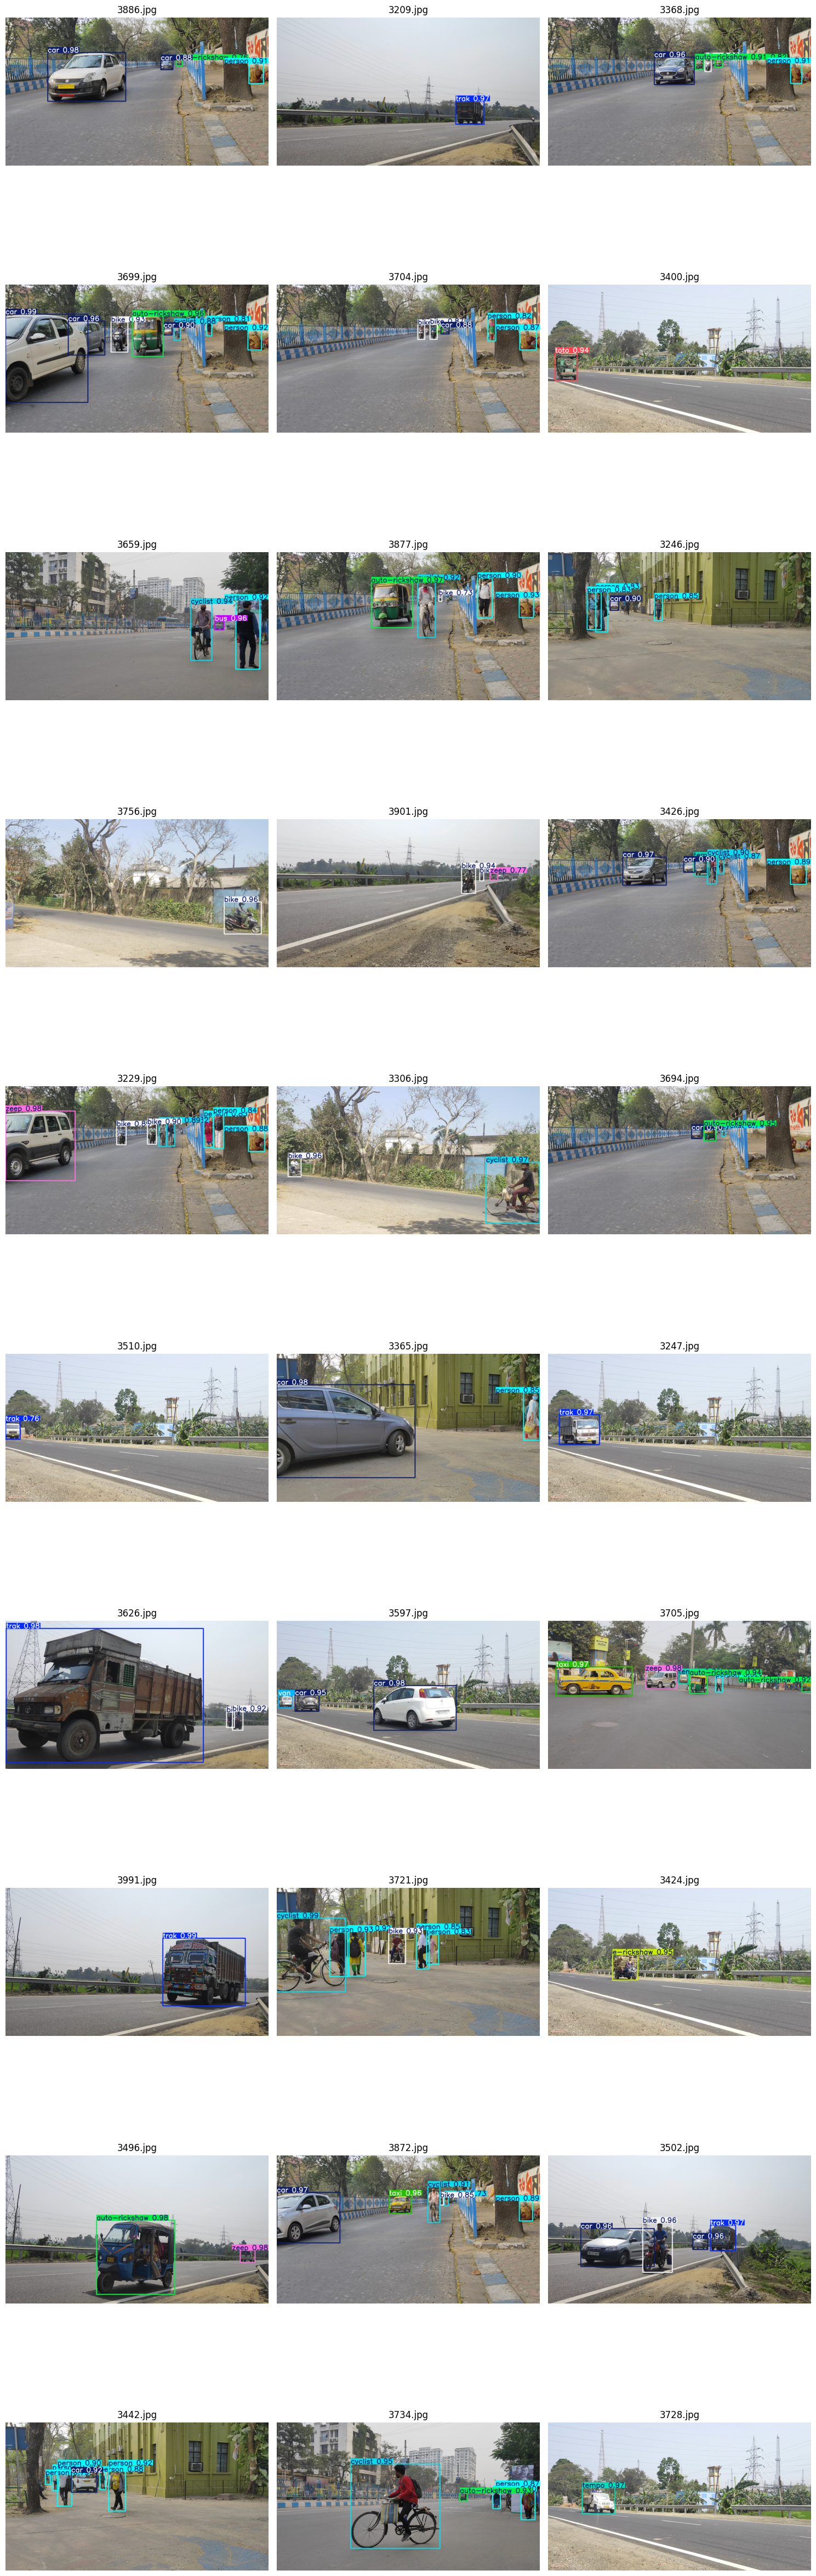

In [10]:
def run_yolov8(image_dir, model_path, total_image=30, output_folder="/kaggle/working/result_vis"):
    # Load the YOLOv11 model
    model = YOLO(model_path)
    
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all images in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    # Select the specified number of random images or all images if total_image is -1
    if total_image == -1:
        selected_files = image_files
    else:
        selected_files = random.sample(image_files, min(total_image, len(image_files)))

    result_images = []  # List to hold result images

    for image_file in selected_files:
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)

        # Run YOLOv11 segmentation prediction
        results = model.predict(image_path, conf=0.7, iou=0.7)
        
        # Get the segmented mask and draw it on the image
        result_image = results[0].plot()
        
        # Save the result image in the output folder
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, result_image)
        
        # Append the result image to the list
        result_images.append(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB

    # Display all result images in a grid
    num_images = len(result_images)
    cols = 3  # Number of columns for the grid
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size as needed
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(result_images[i])
        plt.axis('off')
        plt.title(selected_files[i])  # Optionally add titles

    plt.tight_layout()
    plt.show()



run_yolov8("/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images", model_path = "/kaggle/working/runs/detect/train/weights/best.pt")